Import required libraries

In [1]:
# Import SQLContext and data types
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [2]:
sqlContext = SQLContext(sc)

In [3]:
sc.addPyFile("https://raw.githubusercontent.com/seahboonsiew/pyspark-csv/master/pyspark_csv.py")
import pyspark_csv as pycsv

earthquakes = sc.textFile("swift://notebooks.spark/earthquake.csv")

def skip_header(idx, iterator):
    if (idx == 0):
        next(iterator)
    return iterator

header = earthquakes.first()


header_list = header.split(",")
body = earthquakes.mapPartitionsWithIndex(skip_header)

In [4]:
# create Spark DataFrame using pyspark-csv
earthquakes_df = pycsv.csvToDataFrame(sqlContext, body, sep=",", columns=header_list)
earthquakes_df.cache()

DataFrame[time: timestamp, latitude: double, longitude: double, depth: double, mag: double, magType: string, nst: int, gap: double, dmin: double, rms: double, net: string, id: string, updated: timestamp, place: string, type: string, horizontalError: double, depthError: double, magError: double, magNst: int, status: string, locationSource: string, magSource: string]

In [5]:
# Python expressions in a code cell will be outputted after computation
earthquakes_df.printSchema()

root
 |-- time: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- depth: double (nullable = true)
 |-- mag: double (nullable = true)
 |-- magType: string (nullable = true)
 |-- nst: integer (nullable = true)
 |-- gap: double (nullable = true)
 |-- dmin: double (nullable = true)
 |-- rms: double (nullable = true)
 |-- net: string (nullable = true)
 |-- id: string (nullable = true)
 |-- updated: timestamp (nullable = true)
 |-- place: string (nullable = true)
 |-- type: string (nullable = true)
 |-- horizontalError: double (nullable = true)
 |-- depthError: double (nullable = true)
 |-- magError: double (nullable = true)
 |-- magNst: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- locationSource: string (nullable = true)
 |-- magSource: string (nullable = true)



In [6]:
earthquakes_df.take(1)

[Row(time=datetime.datetime(2016, 1, 30, 17, 59, 55, 340000), latitude=38.836834, longitude=-122.8478317, depth=2.65, mag=0.43, magType=u'md', nst=7, gap=143.0, dmin=0.009799, rms=0.03, net=u'nc', id=u'nc72586646', updated=datetime.datetime(2016, 1, 30, 18, 46, 5, 963000), place=u'10km W of Cobb, California', type=u'earthquake', horizontalError=1.56, depthError=0.87, magError=0.15, magNst=2, status=u'automatic', locationSource=u'nc', magSource=u'nc')]

In [7]:
earthquakes_df.count()

9612

In [12]:
earthquakes_df.registerTempTable("earthquake")
results = sqlContext.sql("select earthquake.* from earthquake where earthquake.place like '%California%'")
results.show()

+--------------------+----------+------------+-----+----+-------+---+------+--------+------+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+---------+--------------+---------+
|                time|  latitude|   longitude|depth| mag|magType|nst|   gap|    dmin|   rms|net|        id|             updated|               place|      type|horizontalError|depthError|magError|magNst|   status|locationSource|magSource|
+--------------------+----------+------------+-----+----+-------+---+------+--------+------+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+---------+--------------+---------+
|2016-01-30 17:59:...| 38.836834|-122.8478317| 2.65|0.43|     md|  7| 143.0|0.009799|  0.03| nc|nc72586646|2016-01-30 18:46:...|10km W of Cobb, C...|earthquake|           1.56|      0.87|    0.15|     2|automatic|            nc|       nc|
|2016-01-30 17:45:...|38.8281667|-122.853833

!pip install --user seaborn

In [64]:
%matplotlib inline

import matplotlib.pyplot as plt
# matplotlib.patches allows us create colored patches, we can use for legends in plots
import matplotlib.patches as mpatches
# seaborn also builds on matplotlib and adds graphical features and new plot types
import seaborn as sns
import pandas as pd

In [65]:
earthquakes_pd = earthquakes_df[earthquakes_df['latitude'] != 0][['longitude', 'latitude', 'time',
                                                               'depth', 'mag', 'magType',
                                                               'place', 'locationSource',
                                                               'status']].toPandas()

earthquakes_pd.columns = ['longitude', 'latitude', 'time', 'depth', 'mag', 'magType',
                                    'place', 'locationSource', 'status']

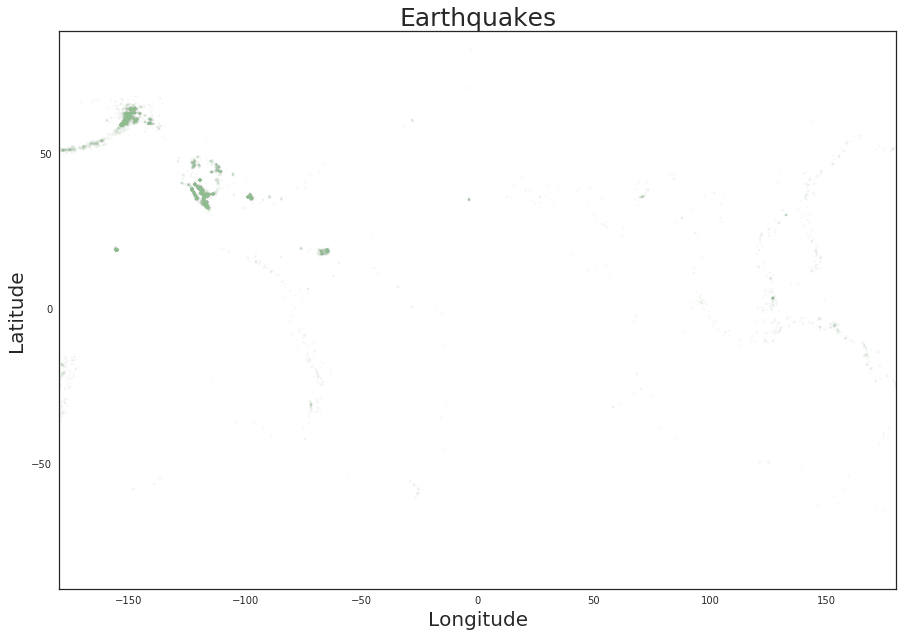

In [66]:
#adjust settings
sns.set_style("white")
plt.figure(figsize=(15,10))

#create scatterplots
plt.scatter(earthquakes_pd.longitude, earthquakes_pd.latitude, alpha=0.05, s=4, color='darkseagreen')

#adjust more settings
plt.title('Earthquakes', size=25)
plt.xlim((-180.0,180.0))
plt.ylim((-90.0,90.00))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.show()

In [67]:
from pyspark.sql.functions import desc

plottingdf = earthquakes_df.groupBy(['locationSource']).count().sort(desc('count')).limit(10).toPandas()

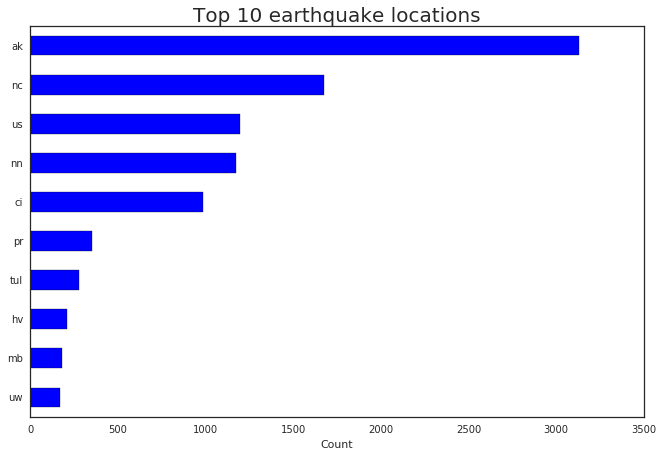

In [68]:
plottingdf[['count']].plot(kind='barh', figsize=(11,7), legend=False)
plt.title('Top 10 earthquake locations', size=20)
plt.xlabel('Count')
plt.yticks(range(10), plottingdf['locationSource'])
plt.gca().invert_yaxis()
plt.show()